In [47]:
import numpy as np
import pandas as pd

df = pd.read_excel('data.xlsx')

X = pd.DataFrame(df['1. 生理性別'])

# X['清大'] = df['2. 學院'].str.contains('清大')
# X['陽交'] = df['2. 學院'].str.contains('陽交')

X['學院'] = 0
X.loc[df['2. 學院'].str.contains('理|工|醫|電|資|科|導|生命|生物|護理'), '學院'] = 1

X['年紀'] = 0
X.loc[df['3. 年級'].str.contains('大三'), '年紀'] = 1
X.loc[df['3. 年級'].str.contains('大四－大六|碩士|博士'), '年紀'] = 2


X['生育個數風氣'] = 0
X.loc[df['4. 請問你認為關於生育，台灣目前的風氣為何？'].str.contains('生1個|生2個|生3個'), '生育個數風氣'] = 1
# X.loc[df['4. 請問你認為關於生育，台灣目前的風氣為何？'].str.contains('生2個'), '生育個數風氣'] = 2
# X.loc[df['4. 請問你認為關於生育，台灣目前的風氣為何？'].str.contains('生3個'), '生育個數風氣'] = 3

X['負擔'] = df['5. 依你過往的觀察，你認為台灣家庭中誰負擔較多養育小孩及打理家務的責任？']

X['責任'] = 0
X.loc[df['6. 若你未來有生子，你認為誰會負擔較多養育小孩及打理家務的責任？'].str.contains('自己'), '責任'] = 1
X.loc[df['6. 若你未來有生子，你認為誰會負擔較多養育小孩及打理家務的責任？'].str.contains('伴侶'), '責任'] = 2

X['政策了解'] = df['10. 請問你認為你多了解台灣目前對應少子化的政策？（生育津貼、托育補助等）']
# X['政策足夠'] = df['11. 請問你認為台灣政府目前對應少子化的政策是否足夠？']

y = pd.DataFrame(df['7. 請問你打算生小孩嗎？'])

print(X.head())
print(y.head())

  1. 生理性別  學院  年紀  生育個數風氣    負擔  責任  政策了解
0     生理男   1   1       1    父親   1     2
1     生理男   1   2       0    父親   0     0
2      其他   1   1       1    父親   0     0
3     生理女   0   0       1  平均負擔   0     3
4     生理女   0   1       0  平均負擔   0     3
  7. 請問你打算生小孩嗎？
0            不生
1            不生
2             生
3            不生
4            不生


In [48]:
x = pd.get_dummies(X)
print(x)

     學院  年紀  生育個數風氣  責任  政策了解  1. 生理性別_其他  1. 生理性別_生理女  1. 生理性別_生理男  負擔_平均負擔  \
0     1   1       1   1     2       False        False         True    False   
1     1   2       0   0     0       False        False         True    False   
2     1   1       1   0     0        True        False        False    False   
3     0   0       1   0     3       False         True        False     True   
4     0   1       0   0     3       False         True        False     True   
..   ..  ..     ...  ..   ...         ...          ...          ...      ...   
116   0   1       0   0     3       False         True        False    False   
117   1   0       0   1     1       False         True        False    False   
118   1   0       0   2     0       False        False         True    False   
119   1   0       0   0     3       False         True        False    False   
120   1   2       0   0     4       False        False         True    False   

     負擔_母親  負擔_父親  
0    False   True  

In [49]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_Y, val_Y = train_test_split(x, y, test_size=0.2, random_state=42)
print(train_X.shape, val_X.shape, train_Y.shape, val_Y.shape)
print(train_X)
print(val_X)

(96, 11) (25, 11) (96, 1) (25, 1)
     學院  年紀  生育個數風氣  責任  政策了解  1. 生理性別_其他  1. 生理性別_生理女  1. 生理性別_生理男  負擔_平均負擔  \
12    1   1       0   2     1       False         True        False     True   
15    1   1       0   0     1       False        False         True     True   
115   1   2       0   0     3       False         True        False    False   
76    1   1       1   0     3       False         True        False    False   
98    0   0       0   1     0       False         True        False    False   
..   ..  ..     ...  ..   ...         ...          ...          ...      ...   
106   0   1       1   0     1       False         True        False    False   
14    1   0       1   0     0       False        False         True     True   
92    0   1       0   0     3       False         True        False    False   
51    0   1       0   1     2       False         True        False    False   
102   1   1       0   1     1       False         True        False    False   

     

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': range(2, 5),  # Adjust max_depth as needed
    'min_samples_split': range(1, 6),  # Adjust min_samples_split as needed
    'min_samples_leaf': range(2, 5)  # Adjust min_samples_leaf as needed
}

# Initialize a DecisionTreeClassifier
model = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the training data
grid_search.fit(train_X, train_Y)

# Get the best estimator
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
train_accuracy = best_model.score(train_X, train_Y)
print("Train Accuracy:", train_accuracy)

# Evaluate the best model on the validation set
val_accuracy = best_model.score(val_X, val_Y)
print("Validation Accuracy:", val_accuracy)

# You can also access the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Validation Accuracy: 0.6354166666666666
Validation Accuracy: 0.64
Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 4}


c:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "c:\Users\user\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 600, 

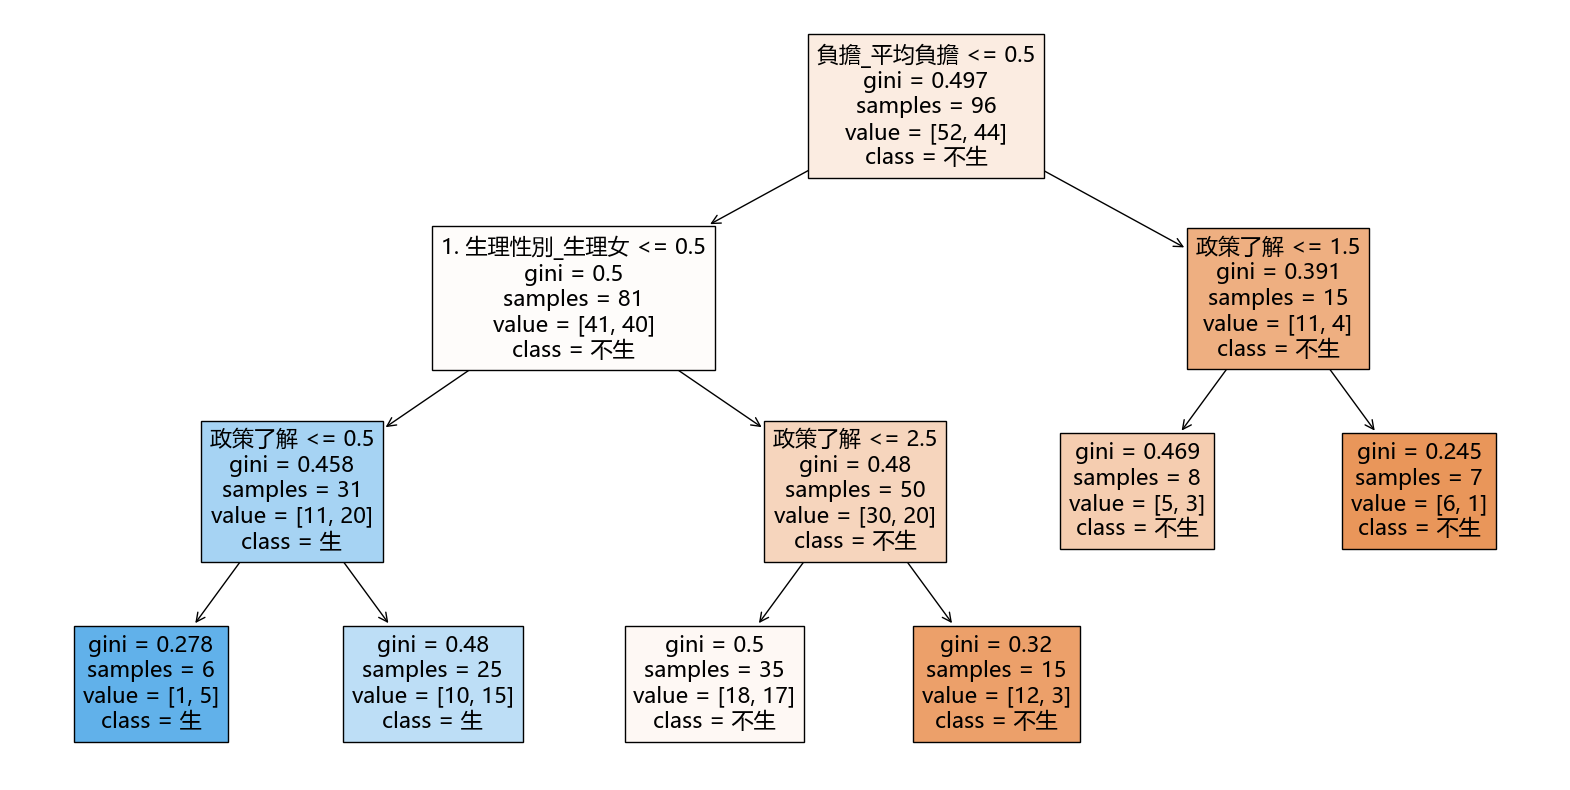

<Figure size 640x480 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt
# Set font to support Chinese characters
plt.rcParams['font.sans-serif'] = ['STHeiti', 'SimHei', 'Microsoft YaHei', 'Noto Sans CJK SC', 'Arial']

from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(best_model, filled=True, feature_names=x.columns, class_names=['不生', '生'])
plt.show()

plt.savefig('decision_tree_plot.png')